<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_ProjetoModulo1/blob/main/Notebooks/3_AnaliseSudeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Módulo 1 - Análise de algumas informações da base de produção hospitalardo do SUS 
## Visão da Região Sudeste por estado comparando com a Região Sul e Nordeste
Olá, bem vindo!

Continuando a análise (recomendo olharem a Análise do Brasil e Análise por Região antes), agora vou comparar os estados da região Sudeste entre si e com a região Sul para verificar possíveis comportamentos distintos, bem como avaliar se realmente São Paulo se parece mais com a região Sul, enquanto Rio e Espírito Santo com a região Nordeste.

A parte de importação, análise e definição do período de análise explorei bem nas análises anteriores, então nesta não comentarei muito o processo e já iremos direto para as avaliações dos gráficos.

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'lightgrey'
plt.rcParams['text.color'] = 'black'

In [3]:
# Criando base de código da região utilizado no DataSUS, conforme padrão já identificado nas aulas e explorações anteriores
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")


In [4]:
# carregando a base de quantidade de internações
internacoes = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/main/Bases/internacoes.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
internacoes["Cod_Região"]=internacoes["Unidade da Federação"].str[0] # criando o campo do códgio da região
internacoes = internacoes.join(Base_regioes, on="Cod_Região") # inclui os nomes das regiões em dados
internacoes["Unidade da Federação"] = internacoes["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
internacoes["Unidade da Federação"] = internacoes["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
internacoes = internacoes.set_index(["Unidade da Federação"]) # definindo UF como índice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [5]:
# carregando a base de gastos
gastos = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/main/Bases/gastos.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
gastos["Cod_Região"]=gastos["Unidade da Federação"].str[0] # criando o campo do códgio da região
gastos = gastos.join(Base_regioes, on="Cod_Região") # trazendo os nomes das regiões para a base
gastos["Unidade da Federação"] = gastos["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
gastos["Unidade da Federação"] = gastos["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
gastos = gastos.set_index("Unidade da Federação") # definindo UF como índice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [6]:
# carregando a base de quantidade de óbitos
obitos = pd.read_csv("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/obitos.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
obitos["Cod_Região"]=obitos["Unidade da Federação"].str[0] # criando o campo do códgio da região
obitos = obitos.join(Base_regioes, on="Cod_Região") # inclui os nomes das regiões em dados
obitos["Unidade da Federação"] = obitos["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
obitos["Unidade da Federação"] = obitos["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
obitos = obitos.set_index("Unidade da Federação") # definindo UF como índice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [7]:
anos = [2014,2015,2016,2017,2018,2019,2020,2021] # anos selecionados
# cria tabela de meses e trimestres
MesTri = pd.DataFrame({"Tri": ["1ºTri","1ºTri","1ºTri","2ºTri","2ºTri","2ºTri","3ºTri","3ºTri","3ºTri","4ºTri","4ºTri","4ºTri"],
                       "Mes": ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out", "Nov", "Dez"]}).set_index("Mes") 
# cria a lista com todos os anos, meses e trimestres para permitir olhar de forma mais agrupada os dados
selecao = []
for ano in anos:
  for mes in MesTri.index:
    selecao = selecao + [[str(ano)+"/"+mes,str(ano)+"/"+MesTri.loc[mes]["Tri"], str(ano), MesTri.loc[mes]["Tri"], mes]]

selecao = pd.DataFrame(selecao, columns=["AnoMes","AnoTri","Ano","Tri","Mes"]).set_index("AnoMes") # transforma a lista em um dataframe
selecao = selecao[:-6] # retira o último semestre de 2021 por sabermos que os últimos meses não são tão completos

In [8]:
# pegando base de tamanho da população de 2001 até 2020 e fazendo alguns tratamentos nas colunas e linhas
populacao = pd.read_excel("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/PopulacaoAnual_2001_2020.xls", skiprows=4, skipfooter=10)
populacao = populacao.drop([0, 1]) # excluindo as colunas que não tem informação relevante
populacao = populacao.set_index("Unidades da Federação") # definindo o índice
# excluindo as linhas de Regiões
Regioes = [i for i in populacao.index if "Região" in i] # selecionando as regiões
populacao = populacao.drop(index=Regioes) # excluindo as regiões

In [9]:
# pegando base de tamanho da população de 2021 e fazendo alguns tratamentos nas colunas e linhas
populacao21 = pd.read_excel("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/PopulacaoAnual_2021.xls", skiprows=2, skipfooter=7)
populacao21 = populacao21.rename(columns={"Brasil":"UF", 213317639:"2021/Jul"}) # alterando o nome das colunas
populacao21 = populacao21.set_index("UF") # definindo o índice
# excluindo as linhas que não são UFs
Regioes = [i for i in populacao21.index if "Região" in i] # selecionando as regiões
populacao21 = populacao21.drop(index=Regioes, columns=["Unnamed: 1"]) # excluindo as regiões e a coluna que não tem informação relevante
populacao21["2021/Jul"] = populacao21["2021/Jul"].astype(str) # transforma o campo em string
populacao21["2021/Jul"] = populacao21["2021/Jul"].str.replace("\(\d\)","") # removemos os itens do tipo: (1), (2), etc.
populacao21["2021/Jul"] = populacao21["2021/Jul"].str.replace("\D","") # removemos os .
populacao21["2021/Jul"] = populacao21["2021/Jul"].astype(float) # transformamos em número

In [10]:
# comecando a criação da base de população por trimestre, primeiro copiando a base de 2021, alterando o nome da coluna
populacaoTri = populacao21.rename(columns={"2021/Jul":"2021/2ºTri"})
populacaoTri["2021/1ºTri"] = np.nan # adicionando o 1ºTri de 2021 vazio
# criando um campo de anos com um ano anterior a selecao para permitir a interpolação posterior
selAnos = [anos[0]-1]
selAnos = selAnos + [int(ano) for ano in anos]
# criando uma lista de trimestres a partir da base MesTri, eliminando as duplicidades
tris = [tri for tri in MesTri["Tri"]]
tris = list(dict.fromkeys(tris)) # elimina as duplicidades
for ano in populacao.columns:
  if ano in selAnos:
    for tri in tris:
      if tri == "2ºTri":
        populacaoTri[str(ano)+"/2ºTri"] = populacao[ano] # se for o 2ºTri pega o valor do ano
      else:
        populacaoTri[str(ano)+"/"+tri] = np.nan # se não deixa vazio
populacaoTri = populacaoTri.T.reset_index() # tranpondo a base
populacaoTri = populacaoTri.rename(columns={"index":"AnoTri"}) # nomeando a coluna de AnoTri 
populacaoTri = populacaoTri.set_index("AnoTri") # definindo ela como índice
populacaoTri = populacaoTri.sort_index() # ordenando por ela
populacaoTri = populacaoTri.interpolate() # interpolando a base
populacaoTri = populacaoTri[4:] # removendo o ano anterior que está fora do período selecionado
populacaoTri["Brasil"] = populacaoTri.sum(axis=1) # cria a coluna Brasil na base de população

In [11]:
# criando a base por trimestre de internações
triInternacoes = internacoes.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triInternacoes = triInternacoes.groupby(["AnoTri"],).sum() # agrupando por trimestre
triInternacoes = triInternacoes[triInternacoes.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triInternacoes["Brasil"] = triInternacoes.sum(axis=1) # cria a coluna Brasil na base de internações

In [12]:
# criando a base por trimestre de gastos
triGastos = gastos.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triGastos = triGastos.groupby(["AnoTri"],).sum() # agrupando por trimestre
triGastos = triGastos[triGastos.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triGastos["Brasil"] = triGastos.sum(axis=1) # cria a coluna Brasil na base de gastos


In [13]:
# criando a base por trimestre de obitos
triObitos = obitos.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triObitos = triObitos.groupby(["AnoTri"],).sum() # agrupando por trimestre
triObitos = triObitos[triObitos.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triObitos["Brasil"] = triObitos.sum(axis=1) # cria a coluna Brasil na base de gastos

In [14]:
# criando tabela de região por estado
EstadoRegiao = pd.DataFrame(gastos["Região"]) # criando tabela de estado e região
EstadoRegiao["Estado"] = EstadoRegiao.index # copiando o index para uma coluna chamada estado
EstadoRegiao = EstadoRegiao.set_index("Região") # transformando o campo região em índice
for regiao in Base_regioes["Região"]:
  triInternacoes[regiao] = 0
  triGastos[regiao] = 0
  triObitos[regiao] = 0
  populacaoTri[regiao] = 0
  for estado in EstadoRegiao["Estado"].filter(regex=regiao, axis=0):
    triInternacoes[regiao] = triInternacoes[regiao]+triInternacoes[estado]
    triGastos[regiao] = triGastos[regiao]+triGastos[estado]
    triObitos[regiao] = triObitos[regiao]+triObitos[estado]
    populacaoTri[regiao] = populacaoTri[regiao]+populacaoTri[estado]

In [15]:
triIntHab = triInternacoes/populacaoTri # cria base de internações por habitante
triGastosHab = triGastos/populacaoTri # cria base de gastos por habitante
triObitosHab = triObitos/populacaoTri # cria base de obitos por habitante
triObitosInt = triObitos/triInternacoes # cria base de obitos por internações
triGastosInt = triGastos/triInternacoes # cria base de gastos por internações

In [16]:
# define os labels do eixoX
labelEixoX = selecao["AnoTri"].tolist()
labelEixoX = list(dict.fromkeys(labelEixoX))
# define as posições que serão substituidas por esses labels
valoresEixoX = [i for i in range(0,len(labelEixoX))]
# criando o campo do que iremos olhar nos gráficos
selecaoGrafico = EstadoRegiao.loc["Sudeste"]["Estado"].to_list()
selecaoGrafico = list(dict.fromkeys(selecaoGrafico))
selecaoGrafico = selecaoGrafico + ["Sul", "Nordeste"]
selecaoGrafico

['Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Sul',
 'Nordeste']

<function matplotlib.pyplot.show>

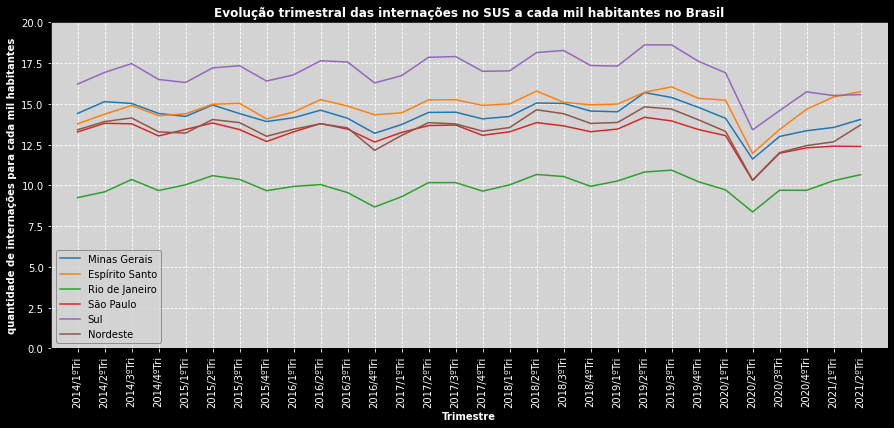

In [17]:
ax = triIntHab.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1e3
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,20/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("quantidade de internações para cada mil habitantes", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral das internações no SUS a cada mil habitantes no Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

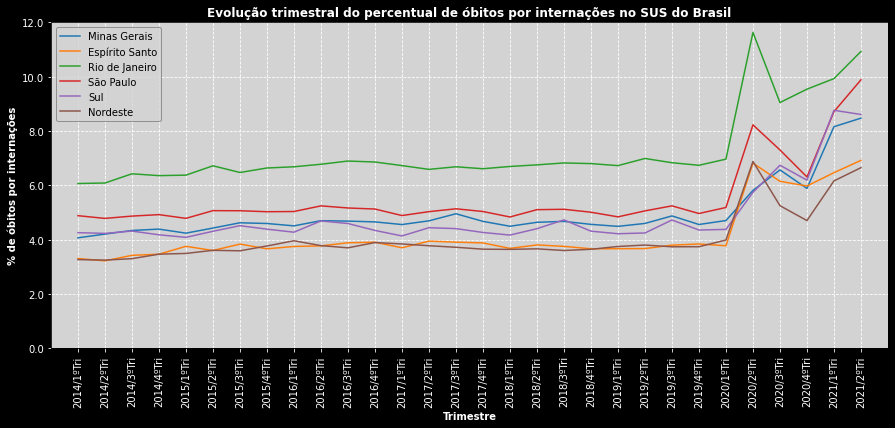

In [18]:
ax = triObitosInt.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1e2
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,12/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("% de óbitos por internações", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral do percentual de óbitos por internações no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

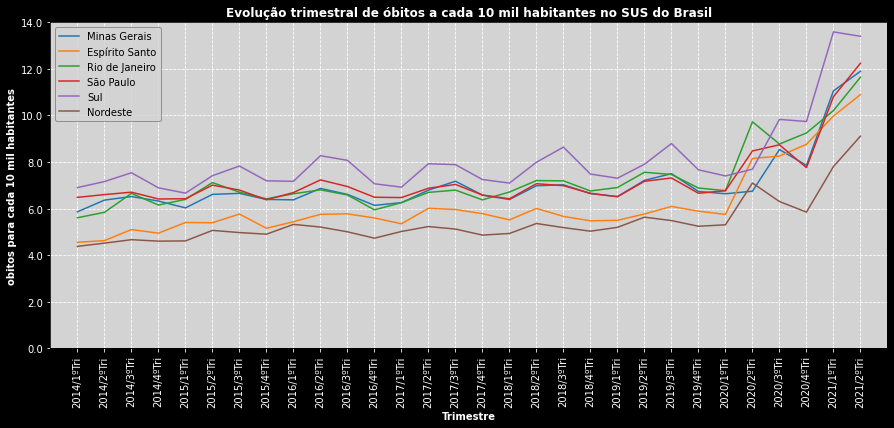

In [19]:
ax = triObitosHab.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1e4
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,14/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("obitos para cada 10 mil habitantes", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral de óbitos a cada 10 mil habitantes no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

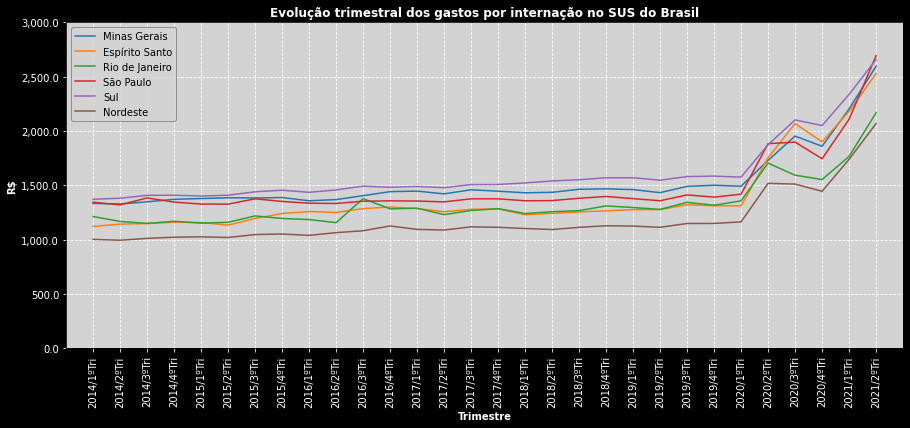

In [20]:
ax = triGastosInt.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.set_ylim(0,3000)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("R$", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral dos gastos por internação no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

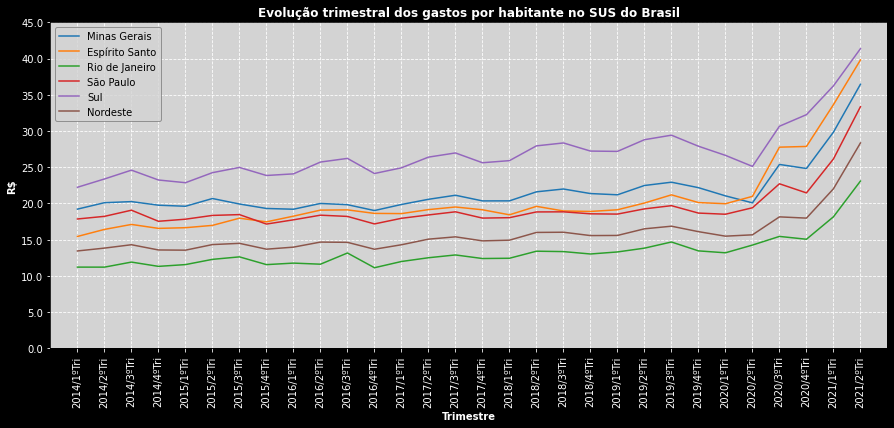

In [21]:
ax = triGastosHab.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.set_ylim(0,45)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("R$", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral dos gastos por habitante no SUS do Brasil", fontweight="bold", color="white")
plt.show

#Análise
Comparando os gráficos dos estados da região Sudeste com os gráficos da região Sul e Nordeste, pode ser que realmente São Paulo e Minas tenham um comportamento sazonal mais parecido com o Sul, enquanto Rio e Espírito Santo mais próximo do Nordeste. 

Já no período pandemico vemos São Paulo se alinhar mais com o comportamento do Nordeste, junto com Rio e Espírito Santo. 

Vamos avaliar isso com mais cuidado repetindo as análises feitas nos notebooks anteriores, começando pela análise da sazonalidade dos óbitos:

<function matplotlib.pyplot.show>

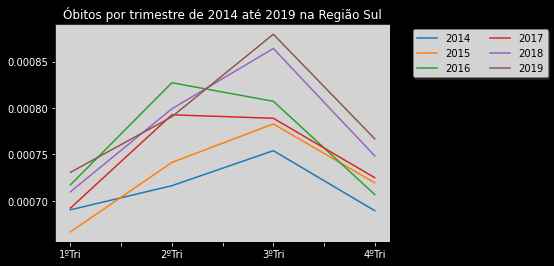

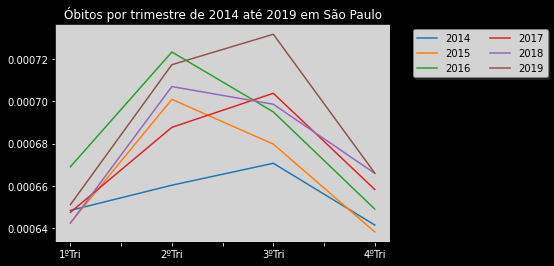

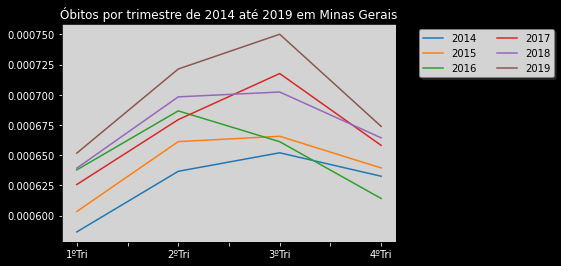

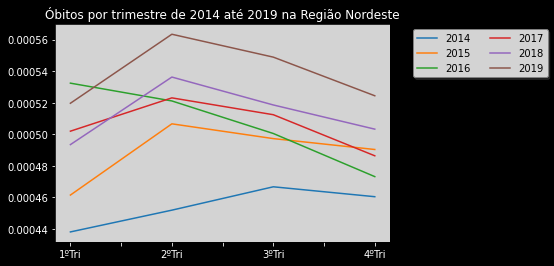

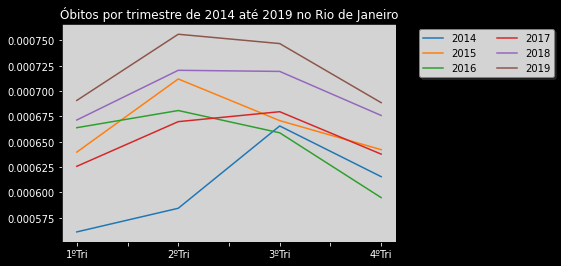

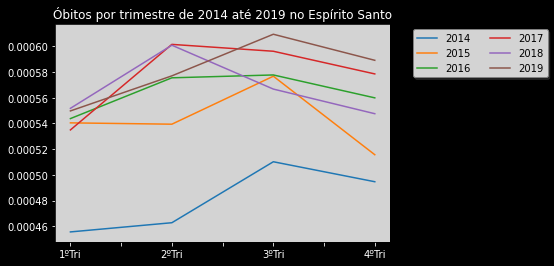

In [22]:
obitosSazonalSul = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Sul"]]
    obitosSazonalSul = obitosSazonalSul + [dado]

obitosSazonalSul = pd.DataFrame(obitosSazonalSul, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax = obitosSazonalSul.T.plot()
ax.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Sul", color="white")

obitosSazonalSãoPaulo = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["São Paulo"]]
    obitosSazonalSãoPaulo = obitosSazonalSãoPaulo + [dado]

obitosSazonalSãoPaulo = pd.DataFrame(obitosSazonalSãoPaulo, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax1 = obitosSazonalSãoPaulo.T.plot()
ax1.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax1.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 em São Paulo", color="white")

obitosSazonalMinasGerais = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Minas Gerais"]]
    obitosSazonalMinasGerais = obitosSazonalMinasGerais + [dado]

obitosSazonalMinasGerais = pd.DataFrame(obitosSazonalMinasGerais, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax2 = obitosSazonalMinasGerais.T.plot()
ax2.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax2.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 em Minas Gerais", color="white")

obitosSazonalNordeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Nordeste"]]
    obitosSazonalNordeste = obitosSazonalNordeste + [dado]

obitosSazonalNordeste = pd.DataFrame(obitosSazonalNordeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax3 = obitosSazonalNordeste.T.plot()
ax3.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax3.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Nordeste", color="white")

obitosSazonalRioJaneiro = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Rio de Janeiro"]]
    obitosSazonalRioJaneiro = obitosSazonalRioJaneiro + [dado]

obitosSazonalRioJaneiro = pd.DataFrame(obitosSazonalRioJaneiro, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax5 = obitosSazonalRioJaneiro.T.plot()
ax5.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax5.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 no Rio de Janeiro", color="white")

obitosSazonalEspíritoSanto = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Espírito Santo"]]
    obitosSazonalEspíritoSanto = obitosSazonalEspíritoSanto + [dado]

obitosSazonalEspíritoSanto = pd.DataFrame(obitosSazonalEspíritoSanto, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax6 = obitosSazonalEspíritoSanto.T.plot()
ax6.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax6.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 no Espírito Santo", color="white")


plt.show


Esses gráficos da sazonalide ficaram bem interessante, mais uma vez podemos perceber um certo padrão que conversa muito com o explicado na live do Atila Iamarino (https://www.youtube.com/watch?v=BtVZ-Gxh8dE&list=PLRRpjE6bL5UxzWZ2T7Gt6pIlFdR4ig4YX entre 1h e 11min e 1h e 30min). Vemos que dentro da região Sudeste temos São Paulo e Minas mais próximos da Região Sul, enquanto Rio de Janeiro e Espírito Santo se aproximam do comportamento da Região Nordeste. Isso reforça ainda mais a tese da sazonalidade de óbitos ter uma relação forte com doenças respiratórias, com certeza vale uma análise complementar.

Agora vamos olhar com mais calma para o período da pandemia de covid-19 que parece fugir um pouco desse padrão acima. Para isso vamos repetir as análises feitas no notebook por Região, olhando o crescimento trimestre a trimestre, contra a média anteior a pandemia, dos óbitos e gastos por habitante. Vamos lá:

In [23]:
obitos2020e2021 = pd.DataFrame(triObitosHab.filter(regex="2020/2ºTri|2020/3ºTri|2020/4ºTri|2021/1ºTri|2021/2ºTri", axis=0)[selecaoGrafico])
obitos2020e2021["Tri"] = obitos2020e2021.index.str[-5:]

mediaObitosTriSul = obitosSazonalSul.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Sul")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Sul"]-mediaObitosTriSul[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriSul[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriSul.sum()+mediaObitosTriSul["2ºTri"])))

print()
mediaObitosTriSãoPaulo = obitosSazonalSãoPaulo.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS em São Paulo")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["São Paulo"]-mediaObitosTriSãoPaulo[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriSãoPaulo[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriSãoPaulo.sum()+mediaObitosTriSãoPaulo["2ºTri"])))

print()
mediaObitosTriMinasGerais = obitosSazonalMinasGerais.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS em Minas Gerais")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Minas Gerais"]-mediaObitosTriMinasGerais[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriMinasGerais[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriMinasGerais.sum()+mediaObitosTriMinasGerais["2ºTri"])))

print()
mediaObitosTriNordeste = obitosSazonalNordeste.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Nordeste")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Nordeste"]-mediaObitosTriNordeste[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriNordeste[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriNordeste.sum()+mediaObitosTriNordeste["2ºTri"])))

print()
mediaObitosTriRioJaneiro = obitosSazonalRioJaneiro.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS no Rio de Janeiro")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Rio de Janeiro"]-mediaObitosTriRioJaneiro[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriRioJaneiro[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriRioJaneiro.sum()+mediaObitosTriRioJaneiro["2ºTri"])))

print()
mediaObitosTriEspíritoSanto = obitosSazonalEspíritoSanto.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS no Espírito Santo")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Espírito Santo"]-mediaObitosTriEspíritoSanto[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriEspíritoSanto[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriEspíritoSanto.sum()+mediaObitosTriEspíritoSanto["2ºTri"])))

Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Sul
2020/2ºTri: -0.1 Ficando -1.1% acima da média deste Tri
2020/3ºTri: 1.7 Ficando 20.9% acima da média deste Tri
2020/4ºTri: 2.5 Ficando 34.2% acima da média deste Tri
2021/1ºTri: 6.6 Ficando 93.8% acima da média deste Tri
2021/2ºTri: 5.6 Ficando 72.2% acima da média deste Tri
Total: 3.3 Ficando 42.9% acima da média para o mesmo período

Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS em São Paulo
2020/2ºTri: 1.5 Ficando 21.2% acima da média deste Tri
2020/3ºTri: 1.8 Ficando 25.5% acima da média deste Tri
2020/4ºTri: 1.2 Ficando 18.8% acima da média deste Tri
2021/1ºTri: 4.3 Ficando 66.2% acima da média deste Tri
2021/2ºTri: 5.2 Ficando 75.0% acima da média deste Tri
Total: 2.8 Ficando 41.3% acima da média para o mesmo período

Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS em Minas Gerais
2020/2ºTri: -0.1 Ficando -0.8% acima da média deste Tri
2020/3ºTri: 1

Comparando as mortes por 10 mil habitantes entre as regiões percebemos que 
Minas Gerais continua com um perfil mais próximo da região Sul, seguindo o que vimos nas sazonalidades, porém São Paulo se aproxima mais do que aconteceu nos outros estados e no Nordeste. Talvez a diferença aqui se deva ao fato da doença ter vindo de fora do país, seria muito dificil não começar por São Paulo que tem duas das maiores cidades do país, com muito contato com o exterior.

Fora isso, percebemos que de todos os estados o Espírito Santo foi o mais afetado, ficando bem acima, tanto nominalmente quanto percentualmente, no incremento de mortes durante esse período.

Agora vamos ver os gastos por internação:

In [24]:
gastosInt2020e2021 = pd.DataFrame(triGastosInt.filter(regex="2020/2ºTri|2020/3ºTri|2020/4ºTri|2021/1ºTri|2021/2ºTri", axis=0)[selecaoGrafico])
gastosInt2020e2021["Tri"] = gastosInt2020e2021.index.str[-5:]

gastosIntSazonalSul = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Sul"]]
    gastosIntSazonalSul = gastosIntSazonalSul + [dado]

gastosIntSazonalSul = pd.DataFrame(gastosIntSazonalSul, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalSul.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Sul")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Sul"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalSãoPaulo = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["São Paulo"]]
    gastosIntSazonalSãoPaulo = gastosIntSazonalSãoPaulo + [dado]

gastosIntSazonalSãoPaulo = pd.DataFrame(gastosIntSazonalSãoPaulo, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalSãoPaulo.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS em São Paulo")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["São Paulo"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalMinasGerais = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Minas Gerais"]]
    gastosIntSazonalMinasGerais = gastosIntSazonalMinasGerais + [dado]

gastosIntSazonalMinasGerais = pd.DataFrame(gastosIntSazonalMinasGerais, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalMinasGerais.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS em Minas Gerais")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Minas Gerais"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalNordeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Nordeste"]]
    gastosIntSazonalNordeste = gastosIntSazonalNordeste + [dado]

gastosIntSazonalNordeste = pd.DataFrame(gastosIntSazonalNordeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalNordeste.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Nordeste")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Nordeste"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalRioJaneiro = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Rio de Janeiro"]]
    gastosIntSazonalRioJaneiro = gastosIntSazonalRioJaneiro + [dado]

gastosIntSazonalRioJaneiro = pd.DataFrame(gastosIntSazonalRioJaneiro, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalRioJaneiro.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS no Rio de Janeiro")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Rio de Janeiro"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalEspíritoSanto = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Espírito Santo"]]
    gastosIntSazonalEspíritoSanto = gastosIntSazonalEspíritoSanto + [dado]

gastosIntSazonalEspíritoSanto = pd.DataFrame(gastosIntSazonalEspíritoSanto, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalEspíritoSanto.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS no Espírito Santo")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Espírito Santo"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Sul
2020/2ºTri: 405.10 Ficando 27.6% acima da média deste Tri
2020/3ºTri: 605.10 Ficando 40.4% acima da média deste Tri
2020/4ºTri: 548.60 Ficando 36.5% acima da média deste Tri
2021/1ºTri: 870.90 Ficando 59.4% acima da média deste Tri
2021/2ºTri: 1,188.00 Ficando 80.9% acima da média deste Tri
Média: 723.55 Ficando 48.8% acima da média anterior

Gastos por Internação Acima da Média dos Anos Anteriores no SUS em São Paulo
2020/2ºTri: 542.30 Ficando 40.4% acima da média deste Tri
2020/3ºTri: 517.10 Ficando 37.5% acima da média deste Tri
2020/4ºTri: 374.50 Ficando 27.3% acima da média deste Tri
2021/1ºTri: 757.60 Ficando 56.1% acima da média deste Tri
2021/2ºTri: 1,351.50 Ficando 100.8% acima da média deste Tri
Média: 708.61 Ficando 52.1% acima da média anterior

Gastos por Internação Acima da Média dos Anos Anteriores no SUS em Minas Gerais
2020/2ºTri: 334.20 Ficando 23.9% acima da média deste Tri
2020/3ºTri: 527.

Agora olhando os gastos por internações, quem se destaca novamente é o estado do Espírito Santo, tendo o maior incremento nos gastos tanto nominalmente quanto percentualmente. No caso do Espírito Santo, além de ser quem aumentou mais o investimento, também foi quem teve o maior número de mortes por habitante. Trazando a dúvida e a necessidade de análise do porquê desse investimento tão alto.

Assim como nas análises dos notebooks anteriores o que chama atenção é o grande incremento no 2ºTri de 2021 comparado aos outros trimestres, valendo o mesmo ponto de entender o que motivou.

# Conclusão da análise dos estados do Sudeste frente a região Sul e Nordeste
Na análise dos estados a hipótese da sazonalidade dos óbitos no total estar relacionada com a sazonalidade das doenças respiratórias, como a gripe, ficou ainda mais forte. Valendo, com certeza, uma análise adicional depois.

O ponto referente ao aumento dos gastos continuar valendo, ficando em aberto a necessidade de uma análise mais detalhada, principalmente com o aumento exprecivo do gasto no 2º Tri de 2021.

O que chamou atenção nos estados foi o Espírito Santo que teve o maior incremento tanto de óbitos por habitante quanto nos gastos por internação, durante o período da pandemia de covid-19. Algo muito triste e preocupante que vale uma análise mais aprofundada.

Com isso terminamos as análises. Caso ainda não tenha visto o README, lá tem um resumo de tudo que vimos nos 3 notebooks.

Até a próxima!